# Imports

In [1]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import warnings
import data_func.read_data as read_data
warnings.filterwarnings("ignore", category=FutureWarning, module="xgboost")


# Load datasets

In [2]:
dataframes = read_data.get_training_data()
X_frames_train = dataframes[0]
Y_frames_train = dataframes[1]
X_frames_test = read_data.get_test_data()


In [3]:
XTRA = X_frames_train[0]
XTRB = X_frames_train[1]
XTRC = X_frames_train[2]

YA = Y_frames_train[0]
YB = Y_frames_train[1]
YC = Y_frames_train[2]

In [4]:
print(XTRA["date_forecast"].head())
print(YA["time"].head())

0   2019-06-02 22:00:00
1   2019-06-02 22:15:00
2   2019-06-02 22:30:00
3   2019-06-02 22:45:00
4   2019-06-02 23:00:00
Name: date_forecast, dtype: datetime64[ns]
0   2019-06-02 22:00:00
1   2019-06-02 23:00:00
2   2019-06-03 00:00:00
3   2019-06-03 01:00:00
4   2019-06-03 02:00:00
Name: time, dtype: datetime64[ns]


To align we can drop entry 0 for both Y and X

In [5]:
print(XTRB["date_forecast"].head())
print(YB["time"].head())

0   2019-01-01 00:00:00
1   2019-01-01 00:15:00
2   2019-01-01 00:30:00
3   2019-01-01 00:45:00
4   2019-01-01 01:00:00
Name: date_forecast, dtype: datetime64[ns]
0   2018-12-31 23:00:00
1   2019-01-01 00:00:00
2   2019-01-01 01:00:00
3   2019-01-01 02:00:00
4   2019-01-01 03:00:00
Name: time, dtype: datetime64[ns]


To align we remove 0 and 1 from Y and 0 from X

In [6]:
print(XTRC["date_forecast"].head())
print(YC["time"].head())

0   2019-01-01 00:00:00
1   2019-01-01 00:15:00
2   2019-01-01 00:30:00
3   2019-01-01 00:45:00
4   2019-01-01 01:00:00
Name: date_forecast, dtype: datetime64[ns]
0   2018-12-31 23:00:00
1   2019-01-01 00:00:00
2   2019-01-01 01:00:00
3   2019-01-01 02:00:00
4   2019-01-01 03:00:00
Name: time, dtype: datetime64[ns]


To align we remove 0 and 1 from Y and 0 from X

In [7]:
# XTRA = XTRA.drop([0]).reset_index(drop=True)
# XTRB = XTRB.drop([0]).reset_index(drop=True)
# XTRC = XTRC.drop([0]).reset_index(drop=True)

# YA = YA.drop([0]).reset_index(drop=True)
# YB = YB.drop([0, 1]).reset_index(drop=True)
# YC = YC.drop([0, 1]).reset_index(drop=True)

Need to reset index for aggregation function

In [8]:
# for x in X_frames_test:
#     print(x["date_forecast"].head())

drop 0 since we want to match on the "whole" hour.

In [9]:
# for i in range(len(X_frames_test)):
#     print(len(X_frames_test[i]))
#     X_frames_test[i] = X_frames_test[i].drop([0]).reset_index(drop=True)

## Cleaning Y-data

### B targets:

Start | End
--- | ---
2019-03-24 00:00:00 | 2019-03-28 00:00:00
2019-05-31 00:00:00 | 2019-06-03 14:00:00
2019-10-28 14:00:00 | 2019-10-30 23:00:00
2020-02-23 17:00:00 | 2020-03-06 06:00:00
2020-03-26 14:00:00 | 2020-03-27 22:00:00
2020-04-02 03:00:00 | 2020-04-16 08:00:00
2020-07-12 23:00:00 | 2020-08-25 23:00:00
2020-09-24 14:00:00 | 2020-09-25 23:00:00
2021-01-15 10:00:00 | 2021-04-19 09:00:00
2021-04-29 00:00:00 | 2021-05-01 23:00:00
2021-06-05 03:00:00 | 2021-06-07 08:00:00
2021-06-13 04:00:00 | 2021-06-14 10:00:00
2021-06-22 03:00:00 | 2021-06-24 08:00:00
2021-07-03 15:00:00 | 2021-07-06 07:00:00
2021-08-26 00:00:00 | 2021-09-03 22:00:00
2021-09-08 15:00:00 | 2021-09-14 13:00:00
2021-09-19 02:00:00 | 2021-09-27 10:00:00
2021-01-30 15:00:00 | 2022-02-04 09:00:00
2022-02-10 21:00:00 | 2022-02-13 07:00:00
2022-02-16 14:00:00 | 2022-02-24 06:00:00
2022-03-19 15:00:00 | 2022-04-13 06:00:00
2022-12-05 17:00:00 | 2023-01-05 08:00:00
2023-02-24 01:00:00 | 2023-02-27 05:00:00
2023-03-07 10:00:00 | 2023-03-10 01:00:00
2023-03-25 23:00:00 | 2023-03-28 02:00:00

### C-targets:

Start | End
---|---
2020-02-23 17:00:00 | 2020-03-08 08:00:00

In [10]:
start_times_b = [
    '2019-03-24 00:00:00',
'2019-05-31 00:00:00',
'2019-10-28 14:00:00',
'2020-02-23 17:00:00',
'2020-03-26 14:00:00',
'2020-04-02 03:00:00',
'2020-07-12 23:00:00',
'2020-09-24 14:00:00',
'2021-01-15 10:00:00',
'2021-04-29 00:00:00',
'2021-06-05 03:00:00',
'2021-06-13 04:00:00',
'2021-06-22 03:00:00',
'2021-07-03 15:00:00',
'2021-08-26 00:00:00',
'2021-09-08 15:00:00',
'2021-09-19 02:00:00',
'2021-01-30 15:00:00',
'2022-02-10 21:00:00',
'2022-02-16 14:00:00',
'2022-03-19 15:00:00',
'2022-12-05 17:00:00',
'2023-02-24 01:00:00',
'2023-03-07 10:00:00',
'2023-03-25 23:00:00'
]

end_times_b = [
    '2019-03-28 00:00:00',
'2019-06-03 14:00:00',
'2019-10-30 23:00:00',
'2020-03-06 06:00:00',
'2020-03-27 22:00:00',
'2020-04-16 08:00:00',
'2020-08-25 23:00:00',
'2020-09-25 23:00:00',
'2021-04-19 09:00:00',
'2021-05-01 23:00:00',
'2021-06-07 08:00:00',
'2021-06-14 10:00:00',
'2021-06-24 08:00:00',
'2021-07-06 07:00:00',
'2021-09-03 22:00:00',
'2021-09-14 13:00:00',
'2021-09-27 10:00:00',
'2022-02-04 09:00:00',
'2022-02-13 07:00:00',
'2022-02-24 06:00:00',
'2022-04-13 06:00:00',
'2023-01-05 08:00:00',
'2023-02-27 05:00:00',
'2023-03-10 01:00:00',
'2023-03-28 02:00:00'
]

print("before B drop: ", len(YB))

for i in range(len(start_times_b)):
    a = pd.to_datetime(start_times_b[i])
    b = pd.to_datetime(end_times_b[i])
    ind = YB[ (YB['time'] >= a) & (YB['time'] <= b)].index
    
    YB.drop(ind, inplace=True)

print("after B drop: ", len(YB))

print("before C drop: ", len(YC))

a = pd.to_datetime("2020-02-23 17:00:00")
b = pd.to_datetime('2020-03-08 08:00:00')
ind = YC[ (YC['time'] >= a) & (YC['time'] <= b)].index
    
YC.drop(ind, inplace=True)
print("after C drop: ", len(YC))

before B drop:  32848
after B drop:  20628
before C drop:  32155
after C drop:  31827


# Data clean up

In [11]:
# making shure that target values line up with x_values
import data_func.aggregation as data_agg

categorical_col = ['dew_or_rime:idx', 'precip_type_5min:idx']

def aggregate_correct_x(x: pd.DataFrame) -> pd.DataFrame:
   categorical = x[["date_forecast"] + categorical_col]
   mean = x.drop(columns=categorical_col)

   categorical = data_agg.gen_agg(categorical, data_agg.stocastic_median, merge_on='first')
   mean = data_agg.gen_agg(mean, "mean", merge_on='first')

   return pd.merge(categorical, mean, on="date_forecast")

def data_allign(x_train, y_train):

  y_train.dropna(inplace=True)
  x_train = aggregate_correct_x(x_train)
  combined_data = pd.merge(x_train, y_train, left_on='date_forecast', right_on='time')
  y_train = combined_data['pv_measurement']

  if 'time' and 'pv_measurement' in combined_data.columns:
    combined_data.drop(columns=['time', 'pv_measurement'], inplace=True)
    
  return combined_data, y_train



X_train = [XTRA, XTRB, XTRC]
Y_train = [YA, YB, YC]

for i in range(len(X_train)):
    X_train[i], Y_train[i] = data_allign(X_train[i], Y_train[i])

for j in range(len(X_frames_test)):
    X_frames_test[j] = aggregate_correct_x(X_frames_test[j])




In [12]:
#Verify length matches
for x in range(len(X_train)):
    print("x,y: ", len(X_train[x]), len(Y_train[x]))



x,y:  29667 29667
x,y:  17161 17161
x,y:  22813 22813


# Feature engineering

In [13]:
import data_func.timeseasonality as DTS
import data_func.one_hot_encoding as OHE
for i in range(len(X_train)):
    X_train[i] = DTS.append_seasonal_columns(X_train[i])
    

for i in range(len(X_frames_test)):
    X_frames_test[i] = DTS.append_seasonal_columns(X_frames_test[i])
    

# THIS SECTION CAN ONLY WORK IF THE PREVIOUS AGGREGATION IS DONE INDIVIDUALLY FOR CATEGORICAL DATA
# import data_func.one_hot_encoding as OHE

for i in range(len(X_train)):
     X_train[i] = OHE.one_hot_encode(X_train[i], ['dew_or_rime:idx', 'precip_type_5min:idx'])

for i in range(len(X_frames_test)):
     X_frames_test[i] = OHE.one_hot_encode(X_frames_test[i], ['dew_or_rime:idx', 'precip_type_5min:idx'])
     x_temp = X_train[i].append(X_frames_test[i], ignore_index = True)
     ind = x_temp[(x_temp['date_forecast'] < X_frames_test[i]['date_forecast'].iloc[0])].index
     print(ind)
     print(i, " x_test before ", len(X_frames_test[i]))
     print(len(x_temp))
     X_frames_test[i] = x_temp.drop(ind)
     X_train[i].drop(columns=['date_forecast'], inplace=True)
     X_frames_test[i].drop(columns=['date_forecast'], inplace=True)
     print(i, " x_test after ", len(X_frames_test[i]))



Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            29657, 29658, 29659, 29660, 29661, 29662, 29663, 29664, 29665,
            29666],
           dtype='int64', length=29667)
0  x_test before  720
30387
0  x_test after  720
Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            17151, 17152, 17153, 17154, 17155, 17156, 17157, 17158, 17159,
            17160],
           dtype='int64', length=17161)
1  x_test before  720
17881
1  x_test after  720
Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            22803, 22804, 22805, 22806, 22807, 22808, 22809, 22810, 22811,
            22812],
           dtype='int64', length=22813)
2  x_test before  720
23533
2  x_test after  720


/var/folders/94/wm45lcfj7sv746_0rnyvdk840000gn/T/ipykernel_45621/1571422442.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x_temp = X_train[i].append(X_frames_test[i], ignore_index = True)
/var/folders/94/wm45lcfj7sv746_0rnyvdk840000gn/T/ipykernel_45621/1571422442.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x_temp = X_train[i].append(X_frames_test[i], ignore_index = True)
/var/folders/94/wm45lcfj7sv746_0rnyvdk840000gn/T/ipykernel_45621/1571422442.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  x_temp = X_train[i].append(X_frames_test[i], ignore_index = True)


In [14]:
X_train[0].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
absolute_humidity_2m:gm3,29667.0,6.379581,2.612027,0.700000,4.400000,5.975000e+00,8.100000,1.605000e+01
air_density_2m:kgm3,29667.0,1.252307,0.034827,1.145000,1.229000,1.251000e+00,1.274000,1.426250e+00
ceiling_height_agl:m,24681.0,3043.045898,2555.343994,27.849998,1183.925049,2.080000e+03,4255.549805,1.228565e+04
clear_sky_energy_1h:J,29667.0,565528.562500,825693.562500,0.000000,0.000000,4.782730e+04,959101.687500,2.988628e+06
clear_sky_rad:W,29667.0,157.091171,229.956268,0.000000,0.000000,1.325000e+01,273.575012,8.351000e+02
cloud_base_agl:m,28055.0,1746.576660,1822.560547,27.900000,598.125000,1.160900e+03,2088.106201,1.167362e+04
dew_point_2m:K,29667.0,276.139557,6.374989,251.074997,271.875000,2.760500e+02,280.924988,2.919500e+02
diffuse_rad:W,29667.0,42.953587,61.441681,0.000000,0.000000,6.162500e+00,72.262501,3.322750e+02
diffuse_rad_1h:J,29667.0,154632.750000,218519.812500,0.000000,0.000000,2.937912e+04,260193.656250,1.191085e+06
direct_rad:W,29667.0,53.717522,112.382446,0.000000,0.000000,2.500000e-02,44.449999,6.834000e+02


## Normalizing columns for neural network

### A-set

In [15]:
X_train[0].isna().sum()

absolute_humidity_2m:gm3              0
air_density_2m:kgm3                   0
ceiling_height_agl:m               4986
clear_sky_energy_1h:J                 0
clear_sky_rad:W                       0
cloud_base_agl:m                   1612
dew_point_2m:K                        0
diffuse_rad:W                         0
diffuse_rad_1h:J                      0
direct_rad:W                          0
direct_rad_1h:J                       0
effective_cloud_cover:p               0
elevation:m                           0
fresh_snow_12h:cm                     0
fresh_snow_1h:cm                      0
fresh_snow_24h:cm                     0
fresh_snow_3h:cm                      0
fresh_snow_6h:cm                      0
is_day:idx                            0
is_in_shadow:idx                      0
msl_pressure:hPa                      0
precip_5min:mm                        0
pressure_100m:hPa                     0
pressure_50m:hPa                      0
prob_rime:p                           0


In [16]:
for i in range(len(X_train)):
    X_train[i].drop(columns=["snow_density:kgm3", "elevation:m"], inplace=True)
    values = {"ceiling_height_agl:m": 20000, "cloud_base_agl:m": 20000}
    X_train[i].fillna(value=values, inplace=True)
    X_frames_test[i].drop(columns=["snow_density:kgm3", "elevation:m"], inplace=True)
    X_frames_test[i].fillna(value=values, inplace=True)
X_train[0].isna().sum()

absolute_humidity_2m:gm3          0
air_density_2m:kgm3               0
ceiling_height_agl:m              0
clear_sky_energy_1h:J             0
clear_sky_rad:W                   0
cloud_base_agl:m                  0
dew_point_2m:K                    0
diffuse_rad:W                     0
diffuse_rad_1h:J                  0
direct_rad:W                      0
direct_rad_1h:J                   0
effective_cloud_cover:p           0
fresh_snow_12h:cm                 0
fresh_snow_1h:cm                  0
fresh_snow_24h:cm                 0
fresh_snow_3h:cm                  0
fresh_snow_6h:cm                  0
is_day:idx                        0
is_in_shadow:idx                  0
msl_pressure:hPa                  0
precip_5min:mm                    0
pressure_100m:hPa                 0
pressure_50m:hPa                  0
prob_rime:p                       0
rain_water:kgm2                   0
relative_humidity_1000hPa:p       0
sfc_pressure:hPa                  0
snow_depth:cm               

### B-set

In [17]:
X_frames_test[1].isna().sum()

absolute_humidity_2m:gm3            0
air_density_2m:kgm3                 0
ceiling_height_agl:m                0
clear_sky_energy_1h:J               0
clear_sky_rad:W                     0
cloud_base_agl:m                    0
dew_point_2m:K                      0
diffuse_rad:W                       0
diffuse_rad_1h:J                    0
direct_rad:W                        0
direct_rad_1h:J                     0
effective_cloud_cover:p             0
fresh_snow_12h:cm                   0
fresh_snow_1h:cm                    0
fresh_snow_24h:cm                   0
fresh_snow_3h:cm                    0
fresh_snow_6h:cm                    0
is_day:idx                          0
is_in_shadow:idx                    0
msl_pressure:hPa                    0
precip_5min:mm                      0
pressure_100m:hPa                   0
pressure_50m:hPa                    0
prob_rime:p                         0
rain_water:kgm2                     0
relative_humidity_1000hPa:p         0
sfc_pressure

### C-set

In [18]:
X_train[2].isna().sum()

absolute_humidity_2m:gm3          0
air_density_2m:kgm3               0
ceiling_height_agl:m              0
clear_sky_energy_1h:J             0
clear_sky_rad:W                   0
cloud_base_agl:m                  0
dew_point_2m:K                    0
diffuse_rad:W                     0
diffuse_rad_1h:J                  0
direct_rad:W                      0
direct_rad_1h:J                   0
effective_cloud_cover:p           0
fresh_snow_12h:cm                 0
fresh_snow_1h:cm                  0
fresh_snow_24h:cm                 0
fresh_snow_3h:cm                  0
fresh_snow_6h:cm                  0
is_day:idx                        0
is_in_shadow:idx                  0
msl_pressure:hPa                  0
precip_5min:mm                    0
pressure_100m:hPa                 0
pressure_50m:hPa                  0
prob_rime:p                       0
rain_water:kgm2                   0
relative_humidity_1000hPa:p       0
sfc_pressure:hPa                  0
snow_depth:cm               

In [37]:
for i in range(len(X_frames_test)):
    X_frames_test[i] = X_frames_test[i].fillna(0)

In [20]:
import tensorflow as tf

normalizer_A = tf.keras.layers.Normalization(axis=-1)
normalizer_A.adapt(X_train[0])

first = np.array(X_train[0][:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print()
  print('Normalized:', normalizer_A(first).numpy())

normalizer_B = tf.keras.layers.Normalization(axis=-1)
normalizer_B.adapt(X_train[1])
normalizer_C = tf.keras.layers.Normalization(axis=-1)
normalizer_C.adapt(X_train[2])

First example: [[    8.02     1.23  2072.6      0.       0.    1731.95   280.79     0.
      0.       0.       0.      99.54     0.       0.       0.       0.
      0.       0.       1.    1003.45     0.     990.9    996.91     0.
      0.04    82.17  1002.97     0.       0.       0.       0.32   347.93
    -21.42     0.     285.45   100.   30549.5      2.15    -1.95     0.07
      0.      -0.5      0.87     0.49    -0.87     0.       1.       0.
      1.       0.       0.       0.       0.  ]]

Normalized: [[ 0.63 -0.62 -0.57 -0.68 -0.68 -0.22  0.73 -0.7  -0.71 -0.48 -0.48  0.98
  -0.15 -0.09 -0.19 -0.1  -0.12 -1.07  1.   -0.49 -0.21 -0.47 -0.47 -0.09
   0.61  0.61 -0.48 -0.16  0.   -0.05  0.99  1.72 -0.93 -0.56  0.86  0.8
  -0.11 -0.53 -0.97 -0.27 -0.02 -0.71  1.22  0.77 -1.14 -0.08  0.17 -0.15
   0.24 -0.21 -0.06 -0.07 -0.01]]


# Training the model

In [21]:
def build_model(normalizer):
    model = tf.keras.Sequential([
        normalizer,
        tf.keras.layers.Dense(64, activation="relu", input_shape=[len(X_train[0].keys())]),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(1)
    ])
    optim = tf.keras.optimizers.RMSprop(0.001)
    model.compile(loss="mse", optimizer=optim, metrics=["mae", "mse"])

    return model

In [31]:
x_train_a, x_val_a, y_train_a, y_val_a = train_test_split(X_train[0], Y_train[0], test_size=0.2, random_state=None)
x_train_b, x_val_b, y_train_b, y_val_b = train_test_split(X_train[1], Y_train[1], test_size=0.2, random_state=None)
x_train_c, x_val_c, y_train_c, y_val_c = train_test_split(X_train[2], Y_train[2], test_size=0.2, random_state=None)

In [23]:
model_a = build_model(normalizer_A)
model_b = build_model(normalizer_B)
model_c = build_model(normalizer_C)


In [24]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history_a = model_a.fit(
    x_train_a,
    y_train_a,
    validation_split=0.2,
    epochs=1000, 
    callbacks=[early_stop])

history_b = model_b.fit(
    x_train_b,
    y_train_b,
    validation_split=0.2,
    epochs=1000, 
    callbacks=[early_stop])

history_c = model_c.fit(
    x_train_c,
    y_train_c,
    validation_split=0.2,
    epochs=1000, 
    callbacks=[early_stop])

Epoch 1/1000
594/594 [==============================] - 1s 728us/step - loss: 847606.1250 - mae: 436.9377 - mse: 847606.1250 - val_loss: 315325.2188 - val_mae: 291.6843 - val_mse: 315325.2188
Epoch 2/1000
594/594 [==============================] - 0s 721us/step - loss: 304610.5625 - mae: 282.3439 - mse: 304610.5625 - val_loss: 273008.2812 - val_mae: 266.8986 - val_mse: 273008.2812
Epoch 3/1000
594/594 [==============================] - 0s 606us/step - loss: 282670.3125 - mae: 267.9108 - mse: 282670.3125 - val_loss: 260258.1406 - val_mae: 255.9777 - val_mse: 260258.1406
Epoch 4/1000
594/594 [==============================] - 0s 555us/step - loss: 273896.7188 - mae: 261.0641 - mse: 273896.7188 - val_loss: 254105.1562 - val_mae: 252.3858 - val_mse: 254105.1562
Epoch 5/1000
594/594 [==============================] - 0s 584us/step - loss: 268405.1250 - mae: 257.5562 - mse: 268405.1250 - val_loss: 249306.0938 - val_mae: 247.1572 - val_mse: 249306.0938
Epoch 6/1000
594/594 [==================

In [24]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history_a = model_a.fit(
    X_train[0],
    Y_train[0],
    validation_split=0.2,
    epochs=1000, 
    callbacks=[early_stop])

history_b = model_b.fit(
    X_train[1],
    Y_train[1],
    validation_split=0.2,
    epochs=1000, 
    callbacks=[early_stop])

history_c = model_c.fit(
    X_train[2],
    Y_train[2],
    validation_split=0.2,
    epochs=1000, 
    callbacks=[early_stop])

Epoch 1/1000
742/742 [==============================] - 1s 682us/step - loss: 702341.8125 - mae: 382.2583 - mse: 702341.8125 - val_loss: 338104.4062 - val_mae: 341.8414 - val_mse: 338104.4062
Epoch 2/1000
742/742 [==============================] - 0s 612us/step - loss: 280746.5625 - mae: 263.5384 - mse: 280746.5625 - val_loss: 308644.2812 - val_mae: 308.5905 - val_mse: 308644.2812
Epoch 3/1000
742/742 [==============================] - 0s 613us/step - loss: 262719.3750 - mae: 249.7901 - mse: 262719.3750 - val_loss: 299597.5000 - val_mae: 300.4305 - val_mse: 299597.5000
Epoch 4/1000
742/742 [==============================] - 0s 634us/step - loss: 254550.9375 - mae: 243.7997 - mse: 254550.9375 - val_loss: 304957.8125 - val_mae: 301.3548 - val_mse: 304957.8125
Epoch 5/1000
742/742 [==============================] - 0s 608us/step - loss: 249064.3594 - mae: 241.2957 - mse: 249064.3594 - val_loss: 306327.7188 - val_mae: 300.4288 - val_mse: 306327.7188
Epoch 6/1000
742/742 [==================

In [26]:
import matplotlib.pyplot as plt

def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 1000000])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

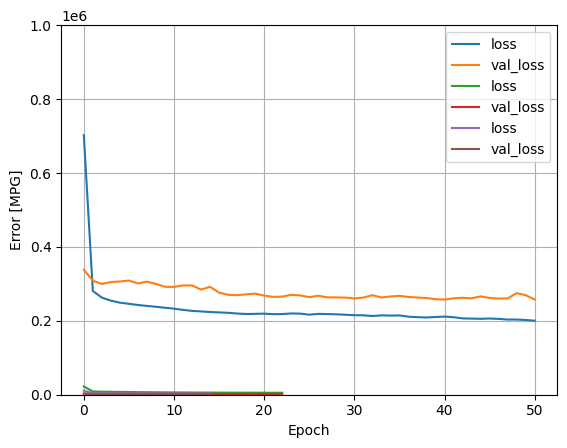

In [27]:
plot_loss(history_a)
plot_loss(history_b)
plot_loss(history_c)

In [27]:
print(model_a.evaluate(x_val_a, y_val_a))
print(model_b.evaluate(x_val_b, y_val_b))
print(model_c.evaluate(x_val_c, y_val_c))

186/186 [==============================] - 0s 425us/step - loss: 208437.0781 - mae: 221.2796 - mse: 208437.0781
[208437.078125, 221.27955627441406, 208437.078125]
108/108 [==============================] - 0s 402us/step - loss: 5196.9565 - mae: 31.6754 - mse: 5196.9565
[5196.95654296875, 31.675405502319336, 5196.95654296875]
143/143 [==============================] - 0s 404us/step - loss: 2754.0056 - mae: 22.8124 - mse: 2754.0056
[2754.005615234375, 22.81242561340332, 2754.005615234375]


In [32]:
y_a = model_a.predict(x_val_a)
y_b = model_b.predict(x_val_b)
y_c = model_c.predict(x_val_c)

143/143 [==============================] - 0s 372us/step


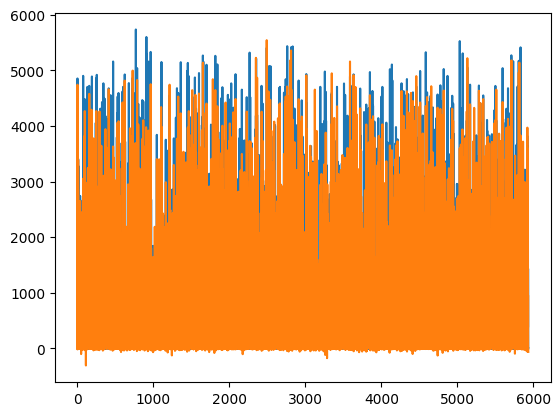

In [33]:
y_val_a.index = range(0, y_val_a.shape[0])
#y.index = range(0, y.shape[0])
plt.plot(y_val_a)
plt.plot(y_a)


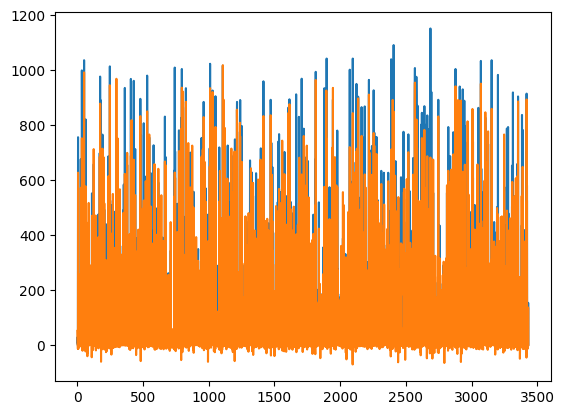

In [34]:
y_val_b.index = range(0, y_val_b.shape[0])
#y.index = range(0, y.shape[0])
plt.plot(y_val_b)
plt.plot(y_b)


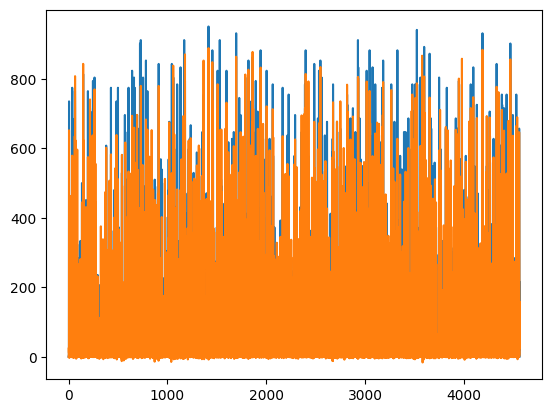

In [35]:
y_val_c.index = range(0, y_val_c.shape[0])
#y.index = range(0, y.shape[0])
plt.plot(y_val_c)
plt.plot(y_c)


In [ ]:
print(len(x_val_a), len(y))

# Make predictions

In [38]:
# Do some more stuff
# Do some more stuff
y_a = model_a.predict(X_frames_test[0])
y_b = model_b.predict(X_frames_test[1])
y_c = model_c.predict(X_frames_test[2])
print(y_a)
X_frames_test[0].describe()


23/23 [==============================] - 0s 451us/step
[[ 1.82248211e+00]
 [ 1.91075420e+00]
 [-4.29417515e+00]
 [ 6.73580551e+01]
 [ 3.14996796e+02]
 [ 8.22117981e+02]
 [ 1.70566675e+03]
 [ 2.34906641e+03]
 [ 2.94926465e+03]
 [ 3.14382666e+03]
 [ 3.11702417e+03]
 [ 2.86431738e+03]
 [ 2.45644971e+03]
 [ 2.18349512e+03]
 [ 2.27010571e+03]
 [ 1.71673621e+03]
 [ 1.29975439e+03]
 [ 8.04325378e+02]
 [ 4.14673370e+02]
 [ 1.68056126e+01]
 [-3.85951710e+00]
 [ 1.82248211e+00]
 [ 5.03264427e-01]
 [ 1.82248211e+00]
 [ 1.82248211e+00]
 [ 2.01489162e+00]
 [ 1.65894604e+00]
 [ 1.40405167e+02]
 [ 6.76299255e+02]
 [ 1.22691687e+03]
 [ 1.72862927e+03]
 [ 2.52819800e+03]
 [ 3.35058398e+03]
 [ 3.77519946e+03]
 [ 3.94672559e+03]
 [ 3.87030200e+03]
 [ 3.73499512e+03]
 [ 3.43511792e+03]
 [ 3.15778467e+03]
 [ 2.73376562e+03]
 [ 2.06126270e+03]
 [ 1.27415125e+03]
 [ 6.60732605e+02]
 [ 1.50596207e+02]
 [ 1.25786543e+01]
 [ 2.13871288e+00]
 [-5.24281502e-01]
 [ 1.82248211e+00]
 [ 8.88247490e-01]
 [ 4.62253094e

,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,...,sinus_year,cosinus_year,dew_or_rime:idx_-1,dew_or_rime:idx_0,dew_or_rime:idx_1,precip_type_5min:idx_0,precip_type_5min:idx_1,precip_type_5min:idx_2,precip_type_5min:idx_3,precip_type_5min:idx_5
count,720.000000,720.000000,720.000000,7.200000e+02,720.000000,720.000000,720.000000,720.000000,7.200000e+02,720.000000,...,720.000000,720.000000,720.0,720.000000,720.000000,720.000000,720.000000,720.0,720.0,720.0
mean,8.205903,1.233150,7510.067871,1.227651e+06,341.014008,3652.147217,280.800171,84.902321,3.056483e+05,114.781693,...,0.422454,-0.859840,0.0,0.970833,0.029167,0.936111,0.063889,0.0,0.0,0.0
std,2.178425,0.032103,7849.354492,1.101479e+06,306.911926,5736.649902,4.339592,78.590202,2.783206e+05,172.185043,...,0.254223,0.133013,0.0,0.168390,0.168390,0.244725,0.244725,0.0,0.0,0.0
min,3.200000,1.151000,53.299999,0.000000e+00,0.000000,30.225000,268.100006,0.000000,0.000000e+00,0.000000,...,-0.025536,-1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
25%,6.693750,1.209000,1219.593781,4.879987e+04,17.950000,540.268738,278.024994,8.087500,3.418273e+04,0.025000,...,0.221860,-0.975078,0.0,1.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0
50%,8.050000,1.238625,3261.587402,9.337900e+05,299.575012,1213.674988,281.049988,75.299999,2.656778e+05,13.950000,...,0.470790,-0.882245,0.0,1.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0
75%,9.981250,1.260000,20000.000000,2.276145e+06,661.737488,3138.106262,284.381248,134.231251,4.891316e+05,184.731247,...,0.634869,-0.772620,0.0,1.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0
max,13.675000,1.299750,20000.000000,2.987530e+06,834.950012,20000.000000,289.549988,307.500000,1.098738e+06,667.799988,...,0.879458,-0.475977,0.0,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0


In [36]:
x_val_a.describe()

,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,...,sinus_year,cosinus_year,dew_or_rime:idx_-1,dew_or_rime:idx_0,dew_or_rime:idx_1,precip_type_5min:idx_0,precip_type_5min:idx_1,precip_type_5min:idx_2,precip_type_5min:idx_3,precip_type_5min:idx_5
count,5934.000000,5934.000000,5934.000000,5.934000e+03,5934.000000,5934.000000,5934.000000,5934.000000,5.934000e+03,5934.000000,...,5934.000000,5934.000000,5934.000000,5934.000000,5934.000000,5934.000000,5934.000000,5934.000000,5934.000000,5934.0
mean,6.379034,1.252626,5730.394531,5.744245e+05,159.780380,2791.953125,276.113342,43.764805,1.569345e+05,53.987328,...,-0.068182,-0.071698,0.007246,0.970846,0.021908,0.941523,0.047860,0.004044,0.006572,0.0
std,2.611334,0.034770,6605.038574,8.262084e+05,229.636154,4596.171875,6.428012,61.533730,2.186478e+05,111.653793,...,0.699628,0.707742,0.084824,0.168252,0.146394,0.234662,0.213487,0.063473,0.080810,0.0
min,0.800000,1.146750,27.924999,0.000000e+00,0.000000,28.150002,251.949997,0.000000,0.000000e+00,0.000000,...,-0.999996,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,4.412500,1.229500,1354.574951,0.000000e+00,0.000000,620.356247,271.899994,0.000000,0.000000e+00,0.000000,...,-0.761450,-0.779159,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0
50%,5.975000,1.251250,2687.781250,6.390854e+04,18.474999,1238.437500,276.049988,8.937500,3.661140e+04,0.075000,...,-0.127693,-0.131119,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0
75%,8.100000,1.274125,6922.568726,9.943267e+05,275.912498,2393.793762,280.950012,73.262501,2.612110e+05,45.493750,...,0.616144,0.628894,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0
max,15.450000,1.423750,20000.000000,2.988456e+06,835.099976,20000.000000,291.600006,313.000000,1.098262e+06,683.400024,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


# Evaluate prediction

In [ ]:

# Evaluate the model based on the validation data

mse_a = mean_squared_error(y_val_a, model_a.predict(x_val_a))
print("MSE for A: ", mse_a)
mse_b = mean_squared_error(y_val_b, model_b.predict(x_val_b))
print("MSE for B: ", mse_b)
mse_c = mean_squared_error(y_val_c, model_c.predict(x_val_c))
print("MSE for C: ", mse_c)
print("Mean MSE: ", (mse_a + mse_b + mse_c) / 3)

# Evaluate the predictions

score_a = model_a.score(x_val_a, y_val_a)
score_b = model_b.score(x_val_b, y_val_b)
score_c = model_c.score(x_val_c, y_val_c)

print("Score A: ", score_a)
print("Score B: ", score_b)
print("Score C: ", score_c)
print('')

# Get feature importance scores
models = [(model_a, 'A'), (model_b, 'B'), (model_c, 'C')]
for model in models:

    feature_importance_scores = model[0].feature_importances_

# Create a DataFrame to associate features with their importance scores
    feature_importance_df1 = pd.DataFrame({'Feature': x_train_a.columns, 'Importance': feature_importance_scores})

# Sort features by importance in descending order
    feature_importance_df1 = feature_importance_df1.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importance scores
    
    print(f'Model {model[1]}')
    print(feature_importance_df1.head(10))
    print('')


# Create submission

In [41]:
y_pred = np.concatenate((y_a, y_b, y_c), axis=0)
for i in range(len(y_pred)):
    if y_pred[i] < 0: 
        y_pred[i] = 0

In [42]:
y_test_pred = y_pred

test = pd.read_csv('../data/test.csv')
test['prediction'] = y_test_pred
sample_submission = pd.read_csv('../data/sample_submission.csv')
submission = sample_submission[['id']].merge(test[['id', 'prediction']], on='id', how='left')
submission.to_csv('submission_tf.csv', index=False)